In [36]:
import numpy as np
import bilby
import matplotlib.pyplot as plt


import scienceplots
plt.style.use(['science', 'bright'])

#import matplotlib as mpl

fontsize = 11
plt.rcParams['axes.labelsize'] = fontsize
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)

plt.rcParams.update({
    'font.size': fontsize,              # Base font size
    'axes.titlesize': fontsize,         # Axes title
    'axes.labelsize': fontsize,         # Axes labels
    'xtick.labelsize': fontsize,        # X-axis tick labels
    'ytick.labelsize': fontsize,        # Y-axis tick labels
    'legend.fontsize': fontsize,        # Legend text
    'figure.titlesize': fontsize        # Figure title
})

from matplotlib.patches import FancyArrowPatch



In [2]:


injection_parameters = {
    "mass_ratio_A": 0.2231017059328386,
    "mass_ratio_B": 0.37172837551203913,
    "chirp_mass_A": 22.353653661893304,
    "chirp_mass_B": 47.64517481623601,
    "luminosity_distance_A": 7.268571745364448 * 50,
    "luminosity_distance_B": 50.09434936920892 * 10,
    "dec_A": 0.6557802485585996,
    "dec_B": -0.25296571570747095,
    "ra_A": 2.180684709384296,
    "ra_B": 4.80942360638223,
    "theta_jn_A": 1.8552485990854504,
    "theta_jn_B": 0.7722659493489856,
    "psi_A": 2.317315123447218,
    "psi_B": 0.3869169812264324,
    "phase_A": 0.736517637678661,
    "phase_B": 1.0168760933964565,
    "a_1_A": 0.5874657489189719,
    "a_1_B": 0.8251185871884739,
    "a_2_A": 0.7740290285427935,
    "a_2_B": 0.03742190139192977,
    "tilt_1_A": 1.8400317067401333,
    "tilt_1_B": 1.2114859809247314,
    "tilt_2_A": 2.4431533314845897,
    "tilt_2_B": 1.731705006294819,
    "phi_12_A": 1.4830050470970393,
    "phi_12_B": 1.2192989717535039,
    "phi_jl_A": 3.5537095497820763,
    "phi_jl_B": 4.538201491570135,
    "geocent_time_A": 3600.0,
    "geocent_time_B": 3600.013082053778854186
  }


signal_A = {key.replace('_A', ''): injection_parameters[key] for key in injection_parameters.keys() if '_A' in key}



duration = 32
sampling_frequency = 4096
minimum_frequency = 20.
approximant = 'IMRPhenomXPHM'
reference_frequency = 50. 


waveform_arguments = dict(
    waveform_approximant=approximant,
    reference_frequency=reference_frequency,
    minimum_frequency=minimum_frequency,
)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)




ifos_A = bilby.gw.detector.InterferometerList(["L1"])
ifos_A.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=signal_A["geocent_time"] - duration + 2,
)

ifos_A[0].inject_signal(
    waveform_generator=waveform_generator, parameters=signal_A
)



magnification = 5
time_delay = 0
phase = 0.5


15:21 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/Users/harsh/opt/anaconda3/envs/vanilla/lib/python3.11/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
15:21 bilby INFO    : Injected signal in L1:
15:21 bilby INFO    :   

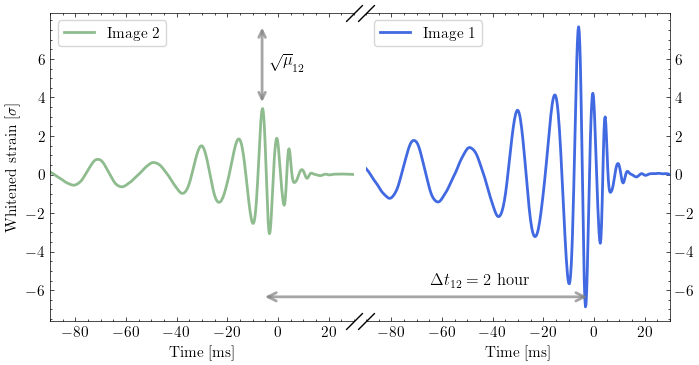

In [121]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), gridspec_kw = {'wspace': 0.04}, sharey = True)
trigger_time = injection_parameters['geocent_time_A']

ax1.plot(1e3*(time_delay + ifos_A[0].time_array-trigger_time), ifos_A[0].whitened_time_domain_strain, color = 'darkseagreen', lw = 2, alpha = 1, label = 'Image 2')
ax2.plot(1e3*(ifos_A[0].time_array-trigger_time), ifos_A[0].whitened_time_domain_strain * np.sqrt(magnification), color = 'royalblue', lw = 2, alpha = 1, label = 'Image 1')


kwargs = dict(marker=[(-1, -1), (1, 1)], markersize=12,
              linestyle='none', color='k', mec='k', mew=1, clip_on=False)

ax1.plot([1], [0], transform=ax1.transAxes, **kwargs)
ax1.plot([1], [1], transform=ax1.transAxes, **kwargs)


ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)
ax2.plot([0], [1], transform=ax2.transAxes, **kwargs)


# Decorations
ax1.set_ylabel('Whitened strain [$\sigma$]')
ax1.legend(frameon=True, fancybox=True, loc='upper left')
ax2.legend(frameon=True, fancybox=True, loc='upper left')

ax1.set_xlabel('Time [ms]')
ax2.set_xlabel('Time [ms]')

# Set x limits if needed
x = 90
ax2.set_xlim(-1*x, 30)
ax1.set_xlim(-1*x, time_delay*1e3 + 30)

ticks = np.arange(-80, 21, 20)
ax1.set_xticks(ticks)
ax2.set_xticks(ticks)

#ax1.set_yticks([-6, -3, 0, 3, 6])
#ax2.set_yticks([-6, -3, 0, 3, 6])

ax1.set_yticks([-6, -4, -2, 0, 2, 4, 6])
ax2.set_yticks([-6, -4, -2, 0, 2, 4, 6])


# Remove spines between axes
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()
#ax1.set_ylim(-4, 4)
ax2.tick_params(labelright=True)
ax1.tick_params(labelright=False)


ax1.tick_params(axis='y', which='minor', right=False)
ax1.tick_params(axis='y', which='major', right=False)

from matplotlib.lines import Line2D

start =[0.39, 0.17]
end = [.80, 0.17]

arrow = FancyArrowPatch(start, end,
                        transform=fig.transFigure,
                        arrowstyle='<->',
                        color='grey', alpha = .7,
                        linewidth=2, mutation_scale = 15)

#line = Line2D(start, end, transform=fig.transFigure, color='black', linewidth=2, ls = ':', alpha = 0.5)
#fig.lines.append(line)
fig.patches.append(arrow)

x = .39
start =[x, 0.65]
end = [x, 0.85]

arrow = FancyArrowPatch(start, end,
                        transform=fig.transFigure,
                        arrowstyle='<->',
                        color='grey', alpha = .7,
                        linewidth=2, mutation_scale = 12
                        )


fig.patches.append(arrow)


fig.text(0.40, 0.75, r'$\sqrt{\mu}_{12}$', fontsize=12, color='black')

fig.text(0.6, 0.20, r'$\Delta t_{12} = 2~\text{hour}$', fontsize=12, color='black')



fig.savefig('lensing_overlap_signals.pdf')
fig.savefig('../../figures/lensing_overlap_signals.pdf')
